## Data preparation

In [35]:
import numpy as np
import scipy
import os
import sklearn as skl
import pandas as pd
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
#import librosa
#import librosa.display
%matplotlib inline

In [2]:
# Load metadata and features.
tracks = pd.read_csv('tracks.csv', header=None)
echonest = pd.read_csv('echonest.csv', header=None)


C:\Users\qusac\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\qusac\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,11,13,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,1

In [3]:
# Change column names from "track.1", ... to named columns
header = tracks.iloc[1]
header[0] = 'track_ID'
tracks.drop(tracks.index[[0,1,2]], inplace=True)
tracks.rename(columns=header, inplace=True)
tracks.head()

header = echonest.iloc[2]
header[0]='track_ID'
echonest.drop(echonest.index[[0,1,2,3]],inplace=True)
echonest.rename(columns = header,inplace=True)
echonest.head()

# Only select songs for which we have echonest data
tracks_with_echonest_data = tracks[tracks['track_ID'].isin(echonest['track_ID'])]
echonest_data = echonest[echonest['track_ID'].isin(tracks_with_echonest_data['track_ID'])]

merged_echonest_data = pd.merge(tracks_with_echonest_data, echonest_data, on = 'track_ID')

# Change duplicate "listens" column to track listens and album listens
duplicate_listens = {'listens': ['album_listens', 'track_listens']}

merged_echonest_data = merged_echonest_data.rename(columns=lambda c: duplicate_listens[c].pop(0) if c in duplicate_listens.keys() else c)

In [4]:
# Extract year released from release date variable
album_release_year = []

for x in merged_echonest_data['date_released']:
    if type(x)==str:
        album_release_year.append(x[0:4])
    else: 
        album_release_year.append(np.nan)

#add album release year to dataframe
merged_echonest_data['album_release_year'] = album_release_year

# Check number of songs released per year and pick year with maximum
import collections
counter=collections.Counter(album_release_year)
print(counter)
print(counter.values())
print(counter.keys())
print(counter.most_common(3))

Counter({nan: 3140, '2010': 1461, '2009': 1426, '2011': 1101, '2008': 1088, '2007': 464, '2012': 380, '2006': 346, '2013': 298, '2014': 245, '2004': 167, '2005': 150, '2015': 145, '2003': 94, '2002': 84, '2001': 69, '1999': 68, '2000': 34, '1997': 25, '1995': 20, '1982': 19, '1998': 17, '1996': 10, '1986': 10, '1981': 6, '1973': 5, '1985': 5, '1992': 3, '1913': 2, '1976': 2, '1912': 1, '1916': 1, '1911': 1, '1909': 1, '1905': 1, '1907': 1, '1988': 1, '1902': 1})
dict_values([1426, 1088, 464, 150, 20, 346, 3140, 94, 19, 6, 69, 84, 167, 34, 68, 10, 1, 1, 1, 2, 1, 1, 1, 25, 3, 1, 17, 1461, 2, 10, 1101, 5, 245, 380, 298, 5, 1, 145])
dict_keys(['2009', '2008', '2007', '2005', '1995', '2006', nan, '2003', '1982', '1981', '2001', '2002', '2004', '2000', '1999', '1996', '1912', '1916', '1911', '1913', '1909', '1905', '1907', '1997', '1992', '1988', '1998', '2010', '1976', '1986', '2011', '1973', '2014', '2012', '2013', '1985', '1902', '2015'])
[(nan, 3140), ('2010', 1461), ('2009', 1426)]


In [5]:
# For chosen year, check the number of songs released per genre; pick top three genres to use
tracks_2010 = merged_echonest_data[merged_echonest_data['album_release_year'] == '2010']

# Top genres for 2010
counter=collections.Counter(tracks_2010['genre_top'])
print(counter)
print(counter.values())
print(counter.keys())
print(counter.most_common(10))

# Remove NAs, if needed 

# Select sensical variables from merged dataset (i.e., some track metadata and named echonest features)

# Stuff above - Kathy

Counter({nan: 524, 'Rock': 372, 'Electronic': 271, 'Hip-Hop': 133, 'Folk': 67, 'Pop': 58, 'Jazz': 23, 'International': 12, 'Instrumental': 1})
dict_values([23, 372, 58, 271, 524, 133, 67, 12, 1])
dict_keys(['Jazz', 'Rock', 'Pop', 'Electronic', nan, 'Hip-Hop', 'Folk', 'International', 'Instrumental'])
[(nan, 524), ('Rock', 372), ('Electronic', 271), ('Hip-Hop', 133), ('Folk', 67), ('Pop', 58), ('Jazz', 23), ('International', 12), ('Instrumental', 1)]


In [6]:
# Add sentiment analysis by title into dataset - compound score of positive / negative sentiment for song title
# Rulan
sentiment= pd.read_csv('sentimental_analysis_title.csv', header=[0])
#sentiment.rename(index=str, columns={'track_ID' : 'track ID'},inplace=True)
sentiment=sentiment[['track_ID','senti comp', 'senti neg','senti pos']]
tracks_2010 = pd.merge(tracks_2010, sentiment, how='inner', on=['track_ID'])

In [23]:
# For baseline model - add genre as a categorical variable 
# Sa

t10 = tracks_2010[['track_ID','latitude','longitude','bit_rate','duration','genre_top','genres_all','track_listens','acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','valence','artist_hotttnesss','senti comp', 'senti neg','senti pos']]

# For genre-specific models - split dataset into three based on top three genres
# Sa

t10.groupby(['genre_top']).size()
Hiphop_10=t10.loc[t10['genre_top'] == 'Hip-Hop']
Rock_10=t10.loc[t10['genre_top'] == 'Rock']
Elec_10=t10.loc[t10['genre_top'] == 'Electronic']

C:\Users\qusac\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


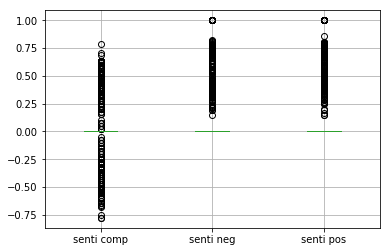

In [40]:
# Make boxplots of variables in genre dataset 
# Sa
t10.boxplot()
# Standardize variables as needed
# Sa
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
y = np.array(t10[['track_listens']].values)
X=(t10[['bit_rate','duration','track_listens','acousticness','danceability','energy','instrumentalness','liveness','speechiness','tempo','valence','artist_hotttnesss','senti comp', 'senti neg','senti pos']].values)
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))
# Repeat for other two genres
# Sa

## Exploratory analysis

In [9]:
# Check for correlation between variables with correlation plot 
# Kathy

# Check for correlation between arist hotness, familiarity, discovery
# Kathy

In [10]:
# Make scatter plots of numerical variables versus outcome (track listens)
# Rulan

# Correlation plots for categorical variables

## Model selection

In [11]:
# Baseline model - use the year with most songs data and include genre as a categorical variable (use the same top 3 genres)

# Convert genre to dummy variables

# Use linear regression with same variables as above (sentiment analysis, track metadata, echonest named variable, location)

# IDEA: we will see that genre is a big predictor of track listens - thus, we train separate models for each genre to dig deeper into why that is

In [12]:
# For 5-folds, split data into training and testing (one of the genres) - will repeat for other two genres (maybe write function to do this)

# Train linear regression model using all variables

# Regularize using L^1 penalty due to large number of features - pick optimal penalty and compare R^2

# Use GridSearchCV with at least 2-fold validation

# Check resulting model on 5 random folds of data 

# Plot coefficients for resulting model 

In [13]:
# Train random forest regression model 

# Regularize using L^1 penalty due to large number of features - pick optimal penalty and compare R^2

# Use GridSearchCV with at least 2-fold validation

# Check resulting model on 5 random folds of data 

# Plot coefficients for resulting model 

In [14]:
# Explore adding other features to model, such as nonlinear features (interaction terms)

In [15]:
# Rock

In [16]:
# Jazz

In [17]:
# Hip hop

In [18]:
# Compare how models are different between different genres - for instance, if certain variables are more or less important for different genres

In [19]:
# Write function that takes in optimal_model, new song audio and necessary info (like genre, track title, etc.) and uses librosa to extract features
# and output a prediction of number of track listens 